# Statistics for Entity Page Views

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [ ]:
entity_views <- read.table("../results/sql_queries/entity_views.tsv", header=FALSE, sep="\t")

In [3]:
colnames(entity_views) <- c('entity_id','page_views')

## All entities

In [4]:
summary(entity_views)

   entity_id          page_views       
 P1     :       1   Min.   :0.000e+00  
 P10    :       1   1st Qu.:1.300e+01  
 P100   :       1   Median :1.360e+02  
 P1000  :       1   Mean   :3.006e+04  
 P10000 :       1   3rd Qu.:9.970e+02  
 P1001  :       1   Max.   :1.253e+10  
 (Other):22250015                      

In [5]:
nrow(entity_views)

[1] 22250021

In [6]:
sd(entity_views$page_views)

[1] 6426969

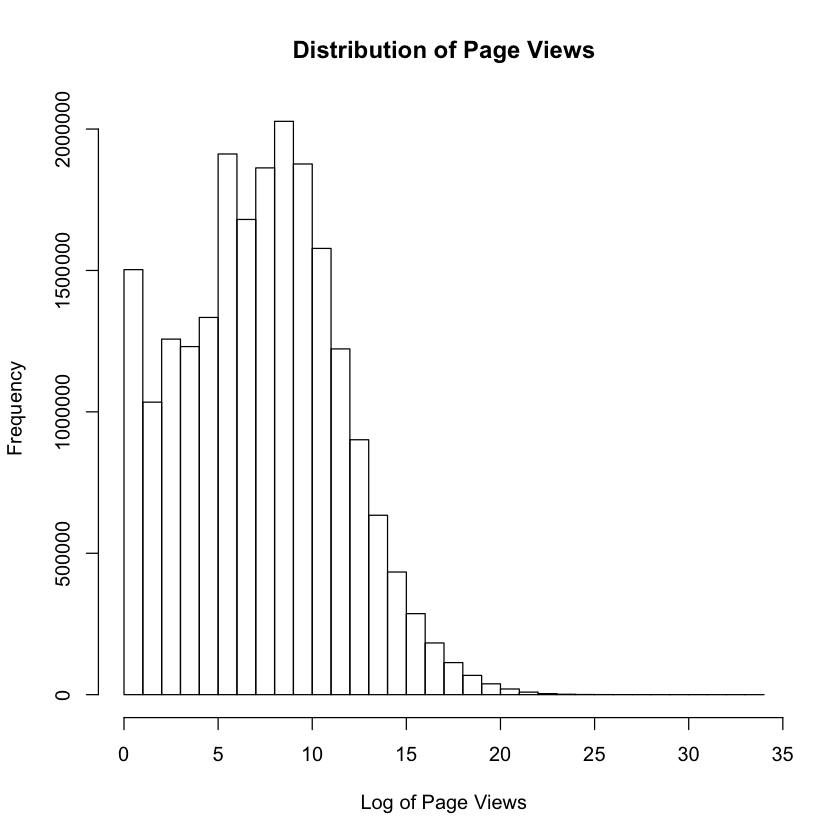

In [7]:
hist(log2(entity_views$page_views),xlab="Log of Page Views", main="Distribution of Page Views")

In [8]:
sorted_descending_entity_values_by_page_views = dplyr::arrange(entity_views, desc(page_views))

In [9]:
head(sorted_descending_entity_values_by_page_views, 25)

entity_id,page_views
Q5296,12530369761
P373,6531371917
Q5,5668008721
P18,5304100266
P856,5143708396
Q6581097,3273952711
P570,3230549347
P31,3153325528
P345,3064724376
P19,2851053904


In [10]:
sorted_ascending_entity_values_by_page_views = dplyr::arrange(entity_views, page_views)

In [11]:
head(sorted_ascending_entity_values_by_page_views, 25)

entity_id,page_views
Q21925466,0
Q24915980,0
Q20124533,0
Q26037902,0
Q17706894,0
Q26933104,0
Q24850595,0
Q20286478,0
Q25562429,0
Q22218454,0


## Entities that do not have page views

In [12]:
entities_with_no_page_views <- subset(entity_views, page_views == 0)

In [13]:
nrow(entities_with_no_page_views)

[1] 1037758

### Entities with no page views over all page views

In [14]:
nrow(entities_with_no_page_views)/nrow(entity_views)

[1] 0.04664076

## Entities that have less than 100 page views

In [15]:
entities_with_less_than_100_page_views <- subset(entity_views, page_views <= 100)

In [16]:
nrow(entities_with_less_than_100_page_views)

[1] 10385721

### Entities with less than 100 page views over all page views

In [17]:
nrow(entities_with_less_than_100_page_views)/nrow(entity_views)

[1] 0.4667735

## Male versus Female Bias

### "Male" Item Usage 

In [18]:
male_item_pages <- filter(sorted_descending_entity_values_by_page_views, entity_id=="Q6581097")

In [19]:
head(male_item_pages)

entity_id,page_views
Q6581097,3273952711


### "Female" Item Usage

In [20]:
female_item_pages <-filter(sorted_descending_entity_values_by_page_views, entity_id=="Q6581072")

In [21]:
head(female_item_pages)

entity_id,page_views
Q6581072,1027466361


In [22]:
female_item_pages$n/male_item_pages$n

numeric(0)